In [25]:
import numpy as np
import h5py
import cv2 
import os, sys
import matplotlib.pyplot as plt
from skimage.feature import *
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from core.utils import apply_median_filter, get_PSNR, get_SSIM

In [3]:
!ls ../data/test_Samsung_SNU_patches_SET050607080910_divided_by_fnum_setnum.hdf5

../data/test_Samsung_SNU_patches_SET050607080910_divided_by_fnum_setnum.hdf5


In [6]:
f = h5py.File("../data/test_Samsung_SNU_patches_SET050607080910_divided_by_fnum_setnum.hdf5",'r')
noisy_img = f['SET05']['F08'][0]
clean_img = f['SET05']['F64'][0]

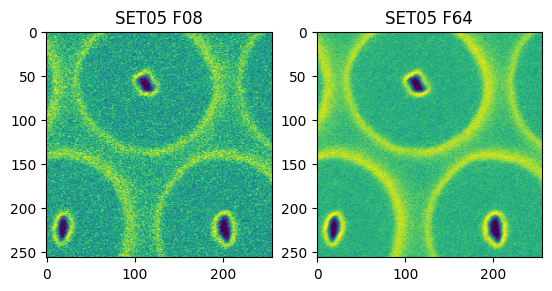

In [9]:
plt.subplot(121)
plt.title('SET05 F08')
plt.imshow(noisy_img)
plt.subplot(122)
plt.title('SET05 F64')
plt.imshow(clean_img)

In [10]:
hxx, hxy, hyy = hessian_matrix(noisy_img, sigma=3)
i1, i2 = hessian_matrix_eigvals([hxx, hxy, hyy])

In [22]:
def show_two_img(img1,img2):
    plt.subplot(121)
    plt.title('img1')
    plt.imshow(img1)
    plt.subplot(122)
    plt.title('img2')
    plt.imshow(img2)

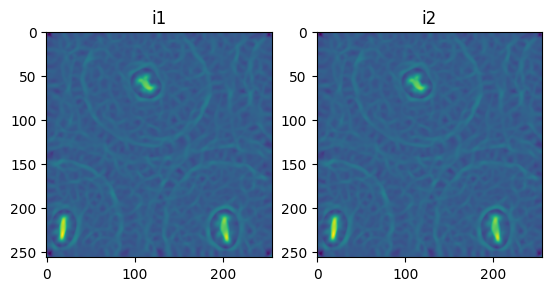

In [12]:
plt.subplot(121)
plt.title('i1')
plt.imshow(i1)
plt.subplot(122)
plt.title('i2')
plt.imshow(i2)
plt.imshow(i1)

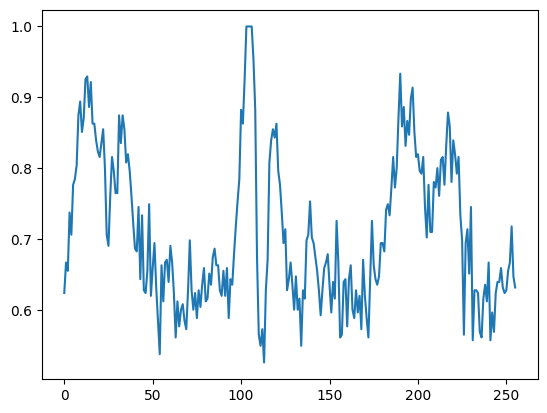

In [33]:
plt.plot(clean_img[50])

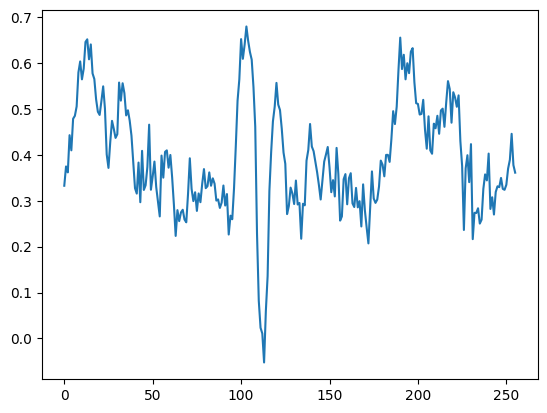

In [34]:
plt.plot(clean_img[50]-make_scaled_img(i1)[50])

In [18]:
def make_scaled_img(img):
    """
        make scaled img 0 ~ 1
    """
    img = img.astype('float64')
    return (img - img.min())/(img.max() - img.min())

(17.78703192120489, 8.015479547469392)

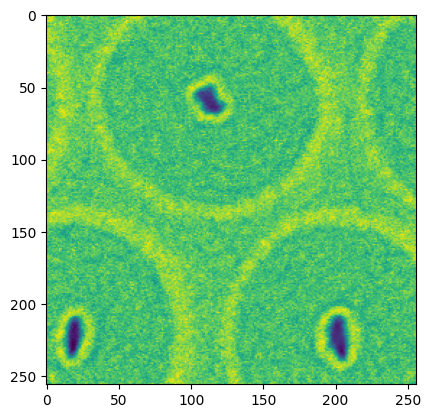

In [28]:
scaled_i1 = make_scaled_img(i1)
target_img = noisy_img - scaled_i1
plt.imshow(target_img)
get_PSNR(clean_img, noisy_img),get_PSNR(clean_img, target_img)

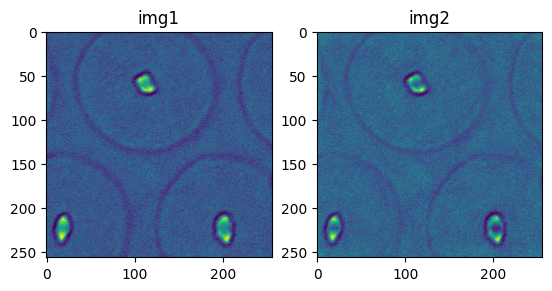

In [23]:
median_img_i1 = apply_median_filter(noisy_img - scaled_i1)
median_img = apply_median_filter(noisy_img)
show_two_img(median_img,median_img_i1)

In [26]:
get_PSNR(clean_img, median_img), get_PSNR(clean_img, median_img_i1)

(2.1384373640429013, -0.684631899773711)